In [1]:
#Crie dois vetores ordenados com 500 números aleatórios distribuídos gaussianamente, sendo
# 1. o primeiro com centro em 36 e desvio padrão de 4, o qual suporemos que é uma distribuição de idade
# 2. o segundo com centro em 7000 e desvio padrão de 1000, o qual suporemos que é uma distribuição de renda


# dicas: - pode utilizar a função random.normal(mu, sigma, N) da bibliteca numpy
#        - para criar um vetor pode-se utilizar a função random.normal conforme exemplo

#Esta será a sua distribuição experimental de idade e renda
import numpy as np

dados_exemplo = sorted([x for x in np.random.normal(5,1,500)])

In [2]:
import numpy as np

idade = sorted([x for x in np.random.normal(36,4,500)])
renda = sorted([x for x in np.random.normal(7000,1000,500)])

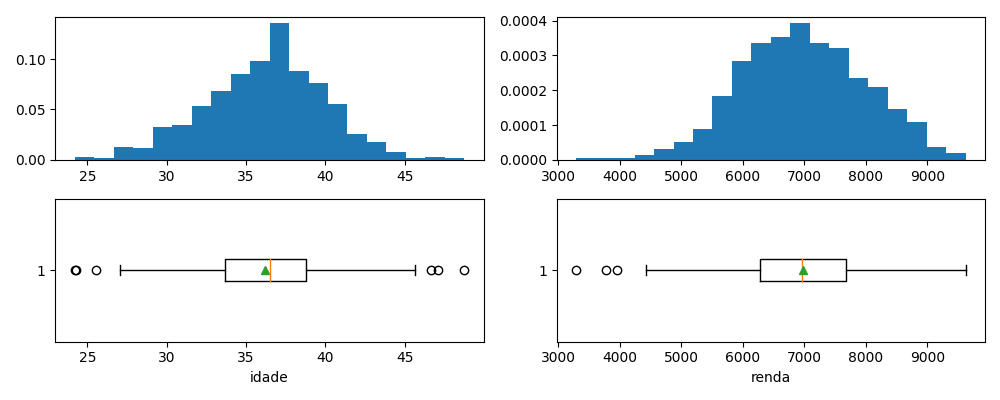

In [3]:
#Plote o histograma e o boxplot das distribuição experimental acima
# dicas: - siga o exemplo abaixo para a construção de dados de frequência dada a distribuição
#        - documentação: https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
#        - pode criar uma segunda coluna em "subplots", por exemplo fazendo: f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(5, 4))

# import matplotlib.pyplot as plt
# f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,1,figsize=(10, 4))

# ax1.hist(idade,bins=20,density=True)
# ax3.boxplot(idade,vert=False, showmeans=True)
# ax3.set_xlabel('idade')

# ax2.hist(renda,bins=20,density=True)
# ax4.boxplot(renda,vert=False, showmeans=True)
# ax4.set_xlabel('renda')

# f.tight_layout()
# display(f)

import matplotlib.pyplot as plt
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10, 4))

ax1.hist(idade,bins=20,density=True)
ax3.boxplot(idade,vert=False, showmeans=True)
ax3.set_xlabel('idade')

ax2.hist(renda,bins=20,density=True)
ax4.boxplot(renda,vert=False, showmeans=True)
ax4.set_xlabel('renda')

f.tight_layout()
display(f)

In [4]:
#Suponha que cada elemento desses dois vetoes de renda e idade são do mesmo usuário e faça uma convulação, criando um terceiro vetor de score,
#que a convulação seja um produto direto: score = idade*renda
#
#dica:   -pode-se usar o enumerate para ter acesso ao índice do vetor e fazer uma operação em outro vetor, por exemplo o código abaixo soma elemento a elemento de dois vetores
a = [1,1,1,1]
b = [2,2,2,2]
c = [x+b[i] for i,x in enumerate(a)]
c

Out[12]: [3, 3, 3, 3]

In [5]:
score = [x+renda[i] for i,x in enumerate(idade)]

In [6]:
#Plote o histograma e o boxplot das distribuição de score resultante
# dicas: - siga o exemplo abaixo para a construção de dados de frequência dada a distribuição
#        - documentação: https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
#        - pode criar uma segunda coluna em "subplots", por exemplo fazendo: f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(5, 4))

# import matplotlib.pyplot as plt
# f, (ax1,ax2) = plt.subplots(2,1,figsize=(5, 4))

# ax1.hist(dados_exemplo,bins=20,density=True)
# ax2.boxplot(dados_exemplo,vert=False, showmeans=True)
# ax2.set_xlabel('valor')
# f.tight_layout()
# display(f)

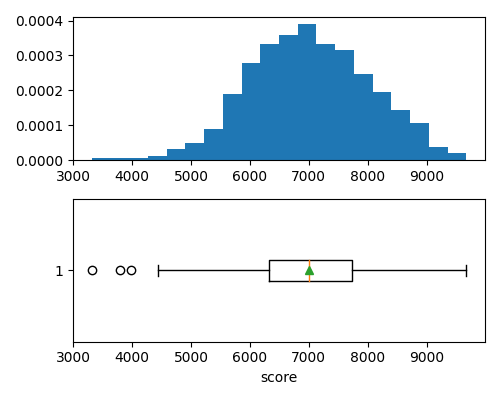

In [7]:
import matplotlib.pyplot as plt
f, (ax1,ax2) = plt.subplots(2,1,figsize=(5, 4))

ax1.hist(score,bins=20,density=True)
ax2.boxplot(score,vert=False, showmeans=True)
ax2.set_xlabel('score')
f.tight_layout()
display(f)

In [8]:
#Calcule a assimetria (skewness) de cada uma das distribuições de idade, renda e score, e também de uma quarta distribuição que seja o log da distribuição de score, e as compare
#
#dica: -pode usar a função "skew" da biblioteca scipy.stats como no exemplo abaixo para obter a "skew", ou a função "skewtest" para verificar se há relevância estatística no teste nulo de assimetria
#      -o python usa o coeficiente de assimetria de segunda ordem de Pearson, ou seja, skew = 3(média-mediana)/
#

# import scipy.stats as st
# st.skew(dados_exemplo)

Out[26]: 0.03563831404473943

In [9]:
import scipy.stats as st
(st.skew(idade), st.skew(renda), st.skew(score), st.skew(np.log(score)))

Out[30]: (-0.16597509441663177,
 -0.10765866032613024,
 -0.10793315984132779,
 -0.6479908639383811)

In [10]:
import scipy.stats as st
(st.skewtest(idade), st.skewtest(renda), st.skewtest(score), st.skewtest(np.log(score)))

Out[31]: (SkewtestResult(statistic=-1.5271373730325306, pvalue=0.1267268553343264),
 SkewtestResult(statistic=-0.9942791032238887, pvalue=0.32008700627285025),
 SkewtestResult(statistic=-0.996800298690204, pvalue=0.3188614532647218),
 SkewtestResult(statistic=-5.519902088650292, pvalue=3.3918860415077977e-08))

In [11]:
#Caso a distribuição do score tenha uma assimetria que impeça de fazer um ajuste com uma normal, tente ajustar essa distribuição com uma lognormal
#
#dicas:  -faça uso da função "lognorm" e método "fit" da biblioteca "scipy.stats" como no exemplo abaixo
#        -documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html

# import scipy.stats as st
# mu, sigma, k = st.lognorm.fit(dados_exemplo)

In [12]:
#Plote o histograma e o boxplot das distribuição de score resultante, em conjunto com a distribuição do melhor ajuste
# dicas: - siga o exemplo abaixo para a construção de dados de frequência dada a distribuição
#        - documentação: https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
#        - a partir dos parâmetros obtidos, pode obter uma distribuição que seja exatamente definida pelo parâmetros do melhor ajuste utilizando o método "lognorm(mu,sigma,x)" também da scipy.stats, e
#          que no exemplo abaixo é feito para a normal

# import matplotlib.pyplot as plt
# import numpy as np

# f, (ax1,ax2) = plt.subplots(2,1,figsize=(5, 4))

# mu, sigma, scale = st.lognorm.fit(dados_exemplo)
# x = np.linspace(np.min(dados_exemplo), np.max(dados_exemplo), 100)
# dados_melhor_ajuste = st.lognorm.pdf(x,mu,sigma,scale)

# ax1.hist(dados_exemplo,bins=20,density=True)
# ax1.plot(x,dados_melhor_ajuste)

# ax2.boxplot(dados_exemplo,vert=False, showmeans=True)
# ax2.set_xlabel('valor')
# f.tight_layout()
# display(f)

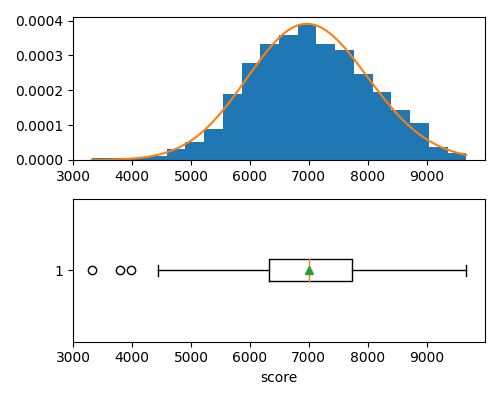

In [13]:
import scipy.stats as st
mu, sigma, scale = st.lognorm.fit(score,loc=0)

x = np.linspace(np.min(score), np.max(score), 100)
dados_melhor_ajuste = st.lognorm.pdf(x,mu,sigma,scale)

import matplotlib.pyplot as plt
import numpy as np

f, (ax1,ax2) = plt.subplots(2,1,figsize=(5, 4))

ax1.hist(score,bins=20,density=True)
ax1.plot(x,dados_melhor_ajuste)

ax2.boxplot(score,vert=False, showmeans=True)
ax2.set_xlabel('score')
f.tight_layout()
display(f)

In [14]:
#Crie duas distirbuições randômicas do tipo Pareto com 5000 números cada, sendo que ambas começem em zero mas a primeira tenha o parâmetro de forma igual a 1.16 e 1.3
#
#dica:  -todas as distribuições contidas na biblioteca scipy.stat tem um gerador de números randômicos no formato da distribuição, esse método é o "rvs", 
#        como no exemplo abaixo para Pareto, onde o primeiro parâmetro é a forma, o segundo a posição inicial e o terceiro a quantidade de números
import scipy.stats as st
pareto = st.pareto.rvs(b=1.5,loc=1,scale=1,size=500)
                    

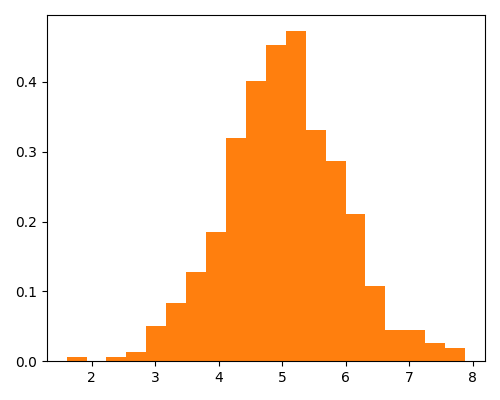

In [15]:
#Plote o histograma das duas distribuições
#
#dica:  - se a taxa de variação da distribuição for muito rápida, sempre pode utilizar o parâmetro "log=True" em um histograma
import matplotlib.pyplot as plt
import numpy as np

f, ax1 = plt.subplots(figsize=(5, 4))

ax1.hist(dados_exemplo,bins=20,density=True)
ax1.hist(dados_exemplo,bins=20,density=True)

f.tight_layout()
display(f)


In [16]:
#Tente ajustar essas distribuições com uma Pareto
#
#dicas:  -faça uso da função "pareto" e método "fit" da biblioteca "scipy.stats" como no exemplo abaixo
#        -documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html
#        -algumas funções possuem muitas regiões indefinidas, então talvez seja necessário fixar alguns dos parâmetros para poder fazer um ajuste, como no exemplo abaixo

import scipy.stats as st

alpha, xm, scale = st.pareto.fit(pareto, loc=1, scale=1)

/databricks/python/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
 Lhat = muhat - Shat*mu

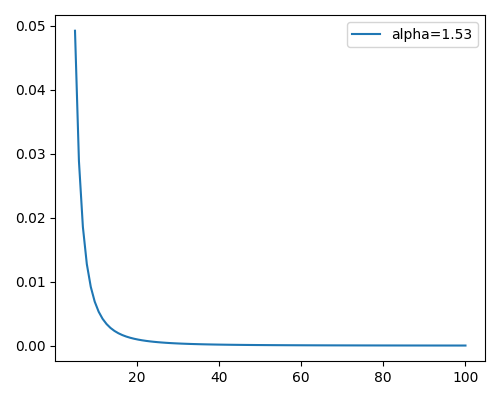

In [17]:
#Plote a PDF do melhor ajuste das duas distribuições acima, utilizando o método "pdf" da função pareto da biblioteca scipy.stats, reduza os limites entre 5 e 100, para vizualizar melhor as diferenças
#
#dica:     -siga o exemplo abaixo:

x = np.linspace(5, 100, 100)
dados_melhor_ajuste = st.pareto.pdf(x,alpha, xm, scale)

import matplotlib.pyplot as plt
import numpy as np

f, ax1 = plt.subplots(figsize=(5, 4))

ax1.plot(x1,dados_melhor_ajuste1,label='alpha='+str(np.round(alpha1,2)))

ax1.legend()
f.tight_layout()
display(f)


In [18]:
#Se essas distribuições representam a distribiução de algum tipo de recurso em diferentes saídas (eg vendas por número de produtos de duas lojas diferentes), 
#qual das duas distribuições é a mais desigual? Quais os fatores de Gini dessas distribuições?